# SEL635/SEL5724 - Visão Computacional Aplicada a Robótica

**Aluno:** Felipe Gomes de Melo

**NUSP:** Preencher com seu número USP

Versão do documento: 1.2

# Lista 1 - Projeção Perspectiva

Um dos propósitos deste exercício é verificar algumas propriedades do modelo de projeção perspectiva, e comparar com o modelo de projeção perspectiva fraca.

## Parte A: Projeção perspectiva

Considere uma câmera sem distorções radiais, com plano de projeção perpendicular ao seu eixo ótico ($\alpha=0$), distância focal $f$ em $[mm]$, dimensão horizontal e vertical de cada pixel, $s_x$ e $s_y$, dadas em $[mm/px]$, projeção do cento óptico na imagem na posição $(o_x,o_y$ dada em $[px]$). 

Considere também, conforme indicado na Figura 1, que a origem na imagem é o canto superior esquerdo, que o eixo $\hat x_{im}$ é o eixo horizontal, e que o eixo $\hat y_{im}$ é o eixo vertical. Também considere que o eixo da câmera $\hat X_c$ está alinhado com a horizontal do plano de projeção, e o eixo da câmera $\hat Y_c$ está alinhado com a vertical do plano de projeção, conforme também indicado na Figura 1.

Utilizando o modelo de projeção perspectiva, complete o código da função `p_im = camera_to_pixel(Pc, f, sx, sy, ox, oy)`. 

A função recebe como entrada: 
*   A matriz $P_c$ de tamanho $3 \times N$, onde cada coluna desta matriz representa a coordenada de um ponto no ambiente, dada em $[mm]$, descrita no sistema de coordenadas da câmera;
*   Os parâmetros intrínsecos da câmera: $f$, $s_x$, $s_y$, $o_x$, $o_y$;

A função retorna:
*   uma matriz $p_{im}$ de dimensão $2 \times N$, em que cada coluna representa a projeção na imagem dada em $[px]$ do ponto correpondente no ambiente;


<div>
<img src="https://drive.google.com/uc?id=1GjlRR1Ng3KBpZLvHUN0w3pUFRDmoRFCL" width="500"/>
</div>
Figura 1 - Sistemas de coordenadas da câmera e da imagem
 

 


In [2]:
# Importar as bibliotecas que serão utilizadas
import numpy as np
import matplotlib.pyplot as plt


### A.1 Complete o código a seguir que realiza a projeção perspectiva

In [3]:
def camera_to_pixel(Pc,f,sx,sy,ox,oy):
    (M,N) = np.shape(Pc) # recupera o tamanho da matriz (N linhas, M colunas)
    if(M!=3):
        print('Aviso: a matriz Pc usada como entrada não possui três linhas!')
        return
  
    p = np.empty((2,N))  # Inicializa o vetor p de dimensão 2xN com zeros
    p_im = np.empty((2,N))  # Inicializa o vetor p de dimensão 2xN com zeros

    # Encontra a projeção perspectiva p dos pontos P no plano da imagem em [mm]:
    p[0] = f*Pc[0]/Pc[2]
    p[1] = f*Pc[1]/Pc[2] 

    # Converte as coordenadas dos pontos p do sistema da câmera em [mm] para o sistema de coordenadas da imagem em [px]:
    
    # x = -(x_im - o_x)s_x
    # x/s_x = -x_im + o_x
    # x/s_x - o_x = -x_im
    # x_im = - x/s_x + o_x
    ###### Coloque aqui o seu código para calcular a matriz p_im #####
    
    p_im[0] = - p[0]/sx + ox
    p_im[1] = - p[1]/sy + oy

    ######
  
    return p_im 


## Parte B: Aplicação da Projeção perspectiva

Considere que uma câmera posicionada conforme mostra a Figura 2. O eixo óptico da câmera $\hat Z_c$ é perpendicular à superficie do cubo cujos vértices da face superior são: $P_1$, $P_2$, $P_3$, e $P_4$. Os vértices da face inferior são: $P_5$, $P_6$, $P_7$ e $P_8$. O eixo óptico está posicionado a uma distância $d$ ao longo de $X_w$ a partir do centro da face do cubo.

<div>
<img src="https://drive.google.com/uc?id=1Gb3OEGGL8PG-LV-_9iLsId_s0i6byRuz" width="500"/>
</div>
Figura 2 - Câmera observando os vértices de um cubo


Considere um cubo com comprimento de aresta $2L$. As coordenadas dos vértices do cubo em relação à câmera são dadas em $[mm]$ por:

\begin{align}
&^cP_1 = [-L; -L-d; Z_c] \\
&^cP_2 = [L; -L-d; Z_c] \\
&^cP_3 = [L; +L-d; Z_c] \\
&^cP_4 = [-L; +L-d; Z_c] \\
&^cP_5 = [-L; -L-d; Z_c+2L] \\
&^cP_6 = [L; -L-d; Z_c+2L] \\
&^cP_7 = [L; +L-d; Z_c+2L] \\
&^cP_8 = [-L; +L-d; Z_c+2L]
\end{align}

Também considere que os parâmetros da câmera são: $f=12~mm$, $s_x=s_y=0.01~mm/px$, $o_x=1000~px$, $o_y=1000~px$.

A função `plot_imagem_cubo(Zc,d)` a seguir mostra a imagem dos vértices do cubo obtida pela câmera. A face superior do cubo é mostrada em azul, a face inferior é mostrada em vermelho, e os vértices laterais em magenta. Para valor de $L=1000$, $d =0$ e $Z_c = 2000$, as coordenadas dos pontos da face superior na imagem em $[px]$ devem ser:

```
p_im_sup = 
 [[1600.  400.  400. 1600. 1600.]
 [1600. 1600.  400.  400. 1600.]]
```



Mostrando resultado para os parâmetros:
L= 1000  Zc= 2000  d= 0  f= 12  sx= 0.01  sy= 0.01  ox= 1000  oy= 1000 

P_sup = 
 [[-1000  1000  1000 -1000 -1000]
 [-1000 -1000  1000  1000 -1000]
 [ 2000  2000  2000  2000  2000]] 

P_inf = 
 [[-1000  1000  1000 -1000 -1000]
 [-1000 -1000  1000  1000 -1000]
 [ 4000  4000  4000  4000  4000]] 

p_im_sup = 
 [[1600.  400.  400. 1600. 1600.]
 [1600. 1600.  400.  400. 1600.]] 

p_im_inf = 
 [[1300.  700.  700. 1300. 1300.]
 [1300. 1300.  700.  700. 1300.]] 



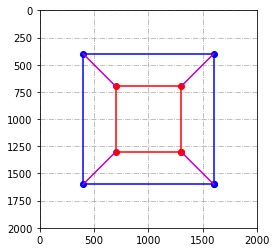

In [25]:
def plot_imagem_cubo(L,Zc,d):
  # Define os parâmetros da câmera
    f=12
    sx=0.01
    sy=0.01
    ox=1000
    oy=1000

    print('Mostrando resultado para os parâmetros:')
    print('L=',L,' Zc=',Zc,' d=',d,' f=',f,' sx=',sx,' sy=',sy,' ox=',ox,' oy=',oy,'\n')

    # Definindo cada ponto como um vetor unidimensional usando a biblioteca numpy
    P1 = np.array([-L, -L-d, Zc])
    P2 = np.array([L, -L-d, Zc])
    P3 = np.array([L, L-d, Zc])
    P4 = np.array([-L, L-d, Zc])
    P5 = np.array([-L, -L-d, Zc+2*L])
    P6 = np.array([L, -L-d, Zc+2*L])
    P7 = np.array([L, L-d, Zc+2*L])
    P8 = np.array([-L, L-d, Zc+2*L])

    # Mostra as coordenadas dos vértices na face superior
    #print('P1 = ',P1)
    #print('P2 = ',P2)
    #print('P3 = ',P3)
    #print('P4 = ',P4)

    # Rearranjando os dados para uma matriz onde cada coluna é um dos pontos
    Pc_sup = np.column_stack((P1,P2,P3,P4,P1))  # P1 foi adicionado no final para que a última aresta possa ser plotada
    print('P_sup = \n',Pc_sup,'\n')
    Pc_inf = np.column_stack((P5,P6,P7,P8,P5))  # P1 foi adicionado no final para que a última aresta possa ser plotada
    print('P_inf = \n',Pc_inf,'\n')

    # Observe que Pc são as coordenadas dos pontos 3D no sistema de coordenadas da câmera
    # Faz a projeção perspectiva dos pontos 3D obtendo as coordenadas em px dos pontos na imagem
    p_im_sup = camera_to_pixel(Pc_sup,f,sx,sy,ox,oy)
    print('p_im_sup = \n',p_im_sup,'\n')
    p_im_inf = camera_to_pixel(Pc_inf,f,sx,sy,ox,oy)
    print('p_im_inf = \n',p_im_inf,'\n')

    # Faz o plot dos pontos
    plt.figure()  # Cria uma nova figura
    plt.plot(p_im_sup[0],p_im_sup[1],'bo-') # Plota a face superior em azul
    plt.axis([0, 2*ox, 0, 2*oy]) # Define os limites da imagem considerando ox e oy no centro
    plt.gca().invert_yaxis() # inverte o eixo y para que a origem fique no canto superior esquerdo
    plt.gca().grid(True, linestyle='-.') # mostra grid
    plt.gca().set_aspect('equal') # mostra eixo x e y com a mesma relação de aspecto

    # Desenha a face inferior
    plt.plot(p_im_inf[0],p_im_inf[1],'ro-')  # Plota a face inferior em vermelho

    # Desenha as arestas laterais
    plt.plot([p_im_sup[0][0], p_im_inf[0][0]],[p_im_sup[1][0], p_im_inf[1][0]],'m-') 
    plt.plot([p_im_sup[0][1], p_im_inf[0][1]],[p_im_sup[1][1], p_im_inf[1][1]],'m-') 
    plt.plot([p_im_sup[0][2], p_im_inf[0][2]],[p_im_sup[1][2], p_im_inf[1][2]],'m-') 
    plt.plot([p_im_sup[0][3], p_im_inf[0][3]],[p_im_sup[1][3], p_im_inf[1][3]],'m-') 


# Executar a função com os parâmetros desejados
plot_imagem_cubo(L=1000, Zc = 2000,d = 0)


### B.1 Quais propriedades da projeção perpectiva é possível observar no exemplo acima?

Resposta: Linhas retas são transformadas em linhas retas, não observamos conservação de formas ou distâncias. Podemos observar também um "ponto de fuga" no centro da imagem, para onde as linhas paralelas perpendiculares ao plano da imagem parecem convergir


## Parte C: Perspectiva Fraca

O modelo de projeção perspectiva fraca considera que todos os pontos observados estão em um mesmo plano, perpendicular ao plano de projeção, e a uma distância $\overline Z$ da câmera. Sendo que $\overline Z$ é a média das coordenadas $^cZ$ dos pontos observados no ambiente em relação ao sistema de coordenada da câmera.

O modelo de projeção perspectiva fraca pode ser entendido como sendo uma projeção ortográfica seguida de um escalonamento isotrópico. Na projeção ortográfica, os pontos são projetados no plano de projeção através de retas paralelas ao eixo óptico. Em seguida, o escalonamento isotrópico aplica um fator de escala em todos os pontos considerando a distância focal e o $\overline Z$. 

Modifique a função `camera_to_pixel(Pc,f,sx,sy,ox,oy)` definida na Parte A, para implementar a função `camera_to_pixel_fraca(Pc,f,sx,sy,ox,oy)` que aplica o modelo de projeção perspectiva fraca para encontrar as coordenadas dos pontos na imagem. Teste para o mesmo caso testado na parte B.

Para valor de $L=1000$, $d =0$ e $Z_c = 2000$, as coordenadas dos 8 pontos (P1 a P8) devem ser: 

```
p_im = 
 [[1400.  600.  600. 1400. 1400.  600.  600. 1400.]
 [1400. 1400.  600.  600. 1400. 1400.  600.  600.]] 
```



### C.1 Complete o código a seguir que realiza a perspectiva fraca

In [10]:
def camera_to_pixel_fraca(Pc,f,sx,sy,ox,oy):
    (M,N) = np.shape(Pc) # recupera o tamanho da matriz (N linhas, M colunas)
    if(M!=3):
        print('Aviso: a matriz Pc usada como entrada não possui três linhas!')
  
    p = np.zeros((2,N))  # Inicializa o vetor p de dimensão 2xN com zeros
    p_im = np.zeros((2,N))  # Inicializa o vetor p de dimensão 2xN com zeros

    # Encontra a projeção perspectiva fraca p dos pontos P no plano da imagem em [mm]:
    ######################################################################
    ##### Implemente seu código aqui

    z_barra = np.mean(Pc[2,:])

    p[0] = f*Pc[0]/z_barra
    p[1] = f*Pc[1]/z_barra

    ######################################################################

    # Converte as coordenadas dos pontos p do sistema da câmera em [mm] para o sistema de coordenadas da imagem em [px]:
    ###### Coloque aqui o seu código para calcular a matriz p_im #####
   
    p_im[0] = - p[0]/sx + ox
    p_im[1] = - p[1]/sy + oy

    ######
  
    return p_im 

Mostrando resultado para os parâmetros:
L= 1000  Zc= 2000  d= 0  f= 12  sx= 0.01  sy= 0.01  ox= 1000  oy= 1000 

Pc = 
 [[-1000  1000  1000 -1000 -1000  1000  1000 -1000]
 [-1000 -1000  1000  1000 -1000 -1000  1000  1000]
 [ 2000  2000  2000  2000  4000  4000  4000  4000]] 

p_im = 
 [[1400.  600.  600. 1400. 1400.  600.  600. 1400.]
 [1400. 1400.  600.  600. 1400. 1400.  600.  600.]] 

p_im_sup = 
 [[1400.  600.  600. 1400. 1400.]
 [1400. 1400.  600.  600. 1400.]] 

p_im_inf = 
 [[1400.  600.  600. 1400. 1400.]
 [1400. 1400.  600.  600. 1400.]] 



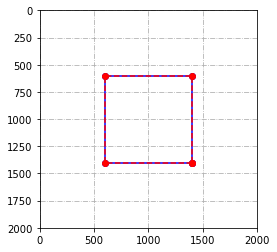

In [27]:
def plot_imagem_cubo_fraca(L,Zc,d):
  # Define os parâmetros da câmera
    f=12
    sx=0.01
    sy=0.01
    ox=1000
    oy=1000

    print('Mostrando resultado para os parâmetros:')
    print('L=',L,' Zc=',Zc,' d=',d,' f=',f,' sx=',sx,' sy=',sy,' ox=',ox,' oy=',oy,'\n')

    # Definindo cada ponto como um vetor unidimensional usando a biblioteca numpy
    P1 = np.array([-L, -L-d, Zc])
    P2 = np.array([L, -L-d, Zc])
    P3 = np.array([L, L-d, Zc])
    P4 = np.array([-L, L-d, Zc])
    P5 = np.array([-L, -L-d, Zc+2*L])
    P6 = np.array([L, -L-d, Zc+2*L])
    P7 = np.array([L, L-d, Zc+2*L])
    P8 = np.array([-L, L-d, Zc+2*L])

    # Rearranjando os dados para uma matriz onde cada coluna é um dos pontos.
    # Para que o modelo de perspectiva fraca calcule a média da coordenada Z, 
    # todos os pontos devem ser passados de uma vez.
    Pc = np.column_stack((P1,P2,P3,P4,P5,P6,P7,P8))  
    print('Pc = \n',Pc,'\n')
  
    # Observe que Pc são as coordenadas dos pontos 3D no sistema de coordenadas da câmera
    # Faz a projeção perspectiva dos pontos 3D obtendo as coordenadas em pixel dos pontos na imagem
    p_im = camera_to_pixel_fraca(Pc,f,sx,sy,ox,oy)
    print('p_im = \n',p_im,'\n')
  
    # Faz o plot dos pontos
    plt.figure()  # Cria uma nova figura
    p_im_sup = np.column_stack((p_im[:,0:4],p_im[:,0].reshape(-1,1))) # Monta a sequencia de pontos (p1, p2, p3, p4, p1)
    print('p_im_sup = \n',p_im_sup,'\n')
    p_im_inf = np.column_stack((p_im[:,4:],p_im[:,4].reshape(-1,1))) # Monta a sequencia de pontos (p5, p6, p7, p8, p5)
    print('p_im_inf = \n',p_im_inf,'\n')
    plt.plot(p_im_sup[0],p_im_sup[1],'bo-') # Plota a face superior em azul
    plt.axis([0, 2*ox, 0, 2*oy]) # Define os limites da imagem considerando ox e oy no centro
    plt.gca().invert_yaxis() # inverte o eixo y para que a origem fique no canto superior esquerdo
    plt.gca().grid(True, linestyle='-.') # mostra grid
    plt.gca().set_aspect('equal') # mostra eixo x e y com a mesma relação de aspecto

    # Desenha a face inferior
    plt.plot(p_im_inf[0],p_im_inf[1],'ro--')  # Plota a face inferior em vermelho

    # Desenha as arestas laterais
    plt.plot([p_im_sup[0][0], p_im_inf[0][0]],[p_im_sup[1][0], p_im_inf[1][0]],'m-') 
    plt.plot([p_im_sup[0][1], p_im_inf[0][1]],[p_im_sup[1][1], p_im_inf[1][1]],'m-') 
    plt.plot([p_im_sup[0][2], p_im_inf[0][2]],[p_im_sup[1][2], p_im_inf[1][2]],'m-') 
    plt.plot([p_im_sup[0][3], p_im_inf[0][3]],[p_im_sup[1][3], p_im_inf[1][3]],'m-') 


# Executar a função com os parâmetros desejados
plot_imagem_cubo_fraca(L=1000, Zc = 2000,d = 0)


### C.2 Para o caso do teste anterior ($Z_c = 2000$) a projeção perspectiva fraca pode ser considerada uma boa aproximação da projeção perspectiva? Por que?

Não a aproximação de projeção perspectiva fraca não se mostra razoável. A principal hipótese adotada é de $\bar{Z} >> \Delta Z$. No caso de um cubo, $\Delta Z = L = 1000$. Portanto, a hipótese se sustenta a paritr da afirmação $2000>>1000$, que claramente não se mostra razoável

### C.3 Para o caso considerado ($L=1000$, $d=0$), qual a faixa de valores de $Z_c$ para o qual a projeção perspectiva fraca se aproxima da projeção perspectiva? Mostre os resultados para um valor de $Z_c$ dentro dessa faixa.

Assumindo uma tolerância de 10% na hipótese $\bar{Z} >> \Delta Z$, o valor de $\Delta Z$ admissível é de 10.000.

Mostrando resultado para os parâmetros:
L= 1000  Zc= 10000  d= 0  f= 12  sx= 0.01  sy= 0.01  ox= 1000  oy= 1000 

P_sup = 
 [[-1000  1000  1000 -1000 -1000]
 [-1000 -1000  1000  1000 -1000]
 [10000 10000 10000 10000 10000]] 

P_inf = 
 [[-1000  1000  1000 -1000 -1000]
 [-1000 -1000  1000  1000 -1000]
 [12000 12000 12000 12000 12000]] 

p_im_sup = 
 [[1120.  880.  880. 1120. 1120.]
 [1120. 1120.  880.  880. 1120.]] 

p_im_inf = 
 [[1100.  900.  900. 1100. 1100.]
 [1100. 1100.  900.  900. 1100.]] 

Mostrando resultado para os parâmetros:
L= 1000  Zc= 10000  d= 0  f= 12  sx= 0.01  sy= 0.01  ox= 1000  oy= 1000 

Pc = 
 [[-1000  1000  1000 -1000 -1000  1000  1000 -1000]
 [-1000 -1000  1000  1000 -1000 -1000  1000  1000]
 [10000 10000 10000 10000 12000 12000 12000 12000]] 

p_im = 
 [[1109.09090909  890.90909091  890.90909091 1109.09090909 1109.09090909
   890.90909091  890.90909091 1109.09090909]
 [1109.09090909 1109.09090909  890.90909091  890.90909091 1109.09090909
  1109.09090909  890.90

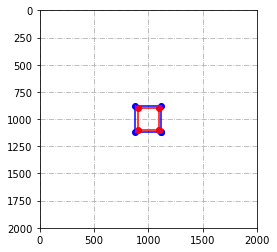

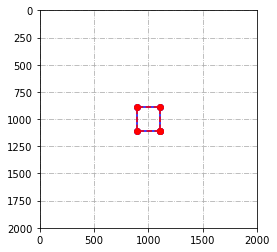

In [33]:
########################################
# Adicione um código aqui que mostra o plot das duas projeções para o Zc escolhido

plot_imagem_cubo(L=1000, Zc = 10000,d = 0)
plot_imagem_cubo_fraca(L=1000, Zc = 10000,d = 0)
#######################################